# Pymaceuticals Inc.
---

### Analysis

- The bar graph showed the Drug Regimen Capomulin has the maximum mice number (230), and Zoniferol has the smaller mice number (182).

- The total number of mice is 248, after removing the duplicate. 

- There are 124 female and 125 male mices.

- The correlation between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation, when the mouse weight increases the average tumor volume also increases.

- The box plot clearly shows that the drug Capomulin and Ramincane has reduced the volume of the tumor.

- The regression analysis helped to understand how much the average tumor volume (the dependent variable) will change when weight of mice change(the independent variables). 

- The R-squared value is 0.70, which means 70% the model fit the data, wich is fairely good to predict the data from the model. Higher R-squared values represent smaller differences between the observed data, and the fitted value. 70% the model explains all of the variation in the response variable around its mean.
From the selected treatments Capomulin and Ramicane reduces the size of tumors better.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path =r"data/Mouse_metadata.csv"
study_results_path = r"data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame



# Combine the data into a single dataset
combine_ms = pd.merge(mouse_metadata,study_results,on='Mouse ID')
combine_ms.head()
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_metadata["Mouse ID"].count() # 249
study_results["Mouse ID"].count() # 1893
len(study_results["Mouse ID"].drop_duplicates()) #so there is the same number of mice in every dataset

249

# Remove Duplicate:
*Before beginning the analysis, check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_metadata.columns #Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
study_results.columns # Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')
mouse_metadata.isna().sum()/len(mouse_metadata) # there is not missings in metadata mouse
study_results.isna().sum()/len(study_results)

Mouse ID              0.0
Timepoint             0.0
Tumor Volume (mm3)    0.0
Metastatic Sites      0.0
dtype: float64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
joint_mouse = study_results.merge(mouse_metadata,on="Mouse ID", how="left")
joint_mouse_45 = joint_mouse.loc[joint_mouse["Timepoint"]==45] #Only 130 mice achieved 45 days 
# joint_mouse.shape 1893,8
joint_mouse.groupby(["Mouse ID","Timepoint"])["Age_months"].count() #at first glance the timepoint is different among each mouse

Mouse ID  Timepoint
a203      0            1
          5            1
          10           1
          15           1
          20           1
                      ..
z969      25           1
          30           1
          35           1
          40           1
          45           1
Name: Age_months, Length: 1888, dtype: int64

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# joint_mouse[["Mouse ID", "Timepoint"]].duplicated() #getting a boolean serie
mouse_duplicated = joint_mouse.loc[joint_mouse[["Mouse ID", "Timepoint"]].duplicated(),"Mouse ID"]
#just one mouse
mouse_duplicated

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [6]:
duplicated_mice = joint_mouse.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

# Locate all the duplicated mice and return Mouse ID
duplicated_mice_ID = joint_mouse.loc[duplicated_mice, 'Mouse ID'].unique()

In [7]:
# Checking the number of mice in the clean DataFrame.
duplicated_mice_ID_data = joint_mouse.loc[joint_mouse['Mouse ID'] == duplicated_mice_ID[0]]
duplicated_mice_ID_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
clean_df = joint_mouse.loc[joint_mouse['Mouse ID']!='g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mice_total_clean = pd.unique(clean_df['Mouse ID'])
len(mice_total_clean)


248

## Summary Statistics

* Use the cleaned data for the remaining steps.
* Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

In [10]:
# Generate a summary statistics table of mean, median, var, std and SEM of the tumor volume for each regimen
# cleaned DataFrame is used from this point going forward.
# Use groupby and summary statistical methods to calculate properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_df = clean_df.groupby('Drug Regimen')

tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_var = summary_df['Tumor Volume (mm3)'].var()
tumor_std = summary_df['Tumor Volume (mm3)'].std()
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.

summary_regimen_df = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median, 'Variance': tumor_var,
                                   'Standard Deviation': tumor_std, 'SEM': tumor_sem
                                  })

summary_regimen_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

## Bar and Pie Charts

- Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

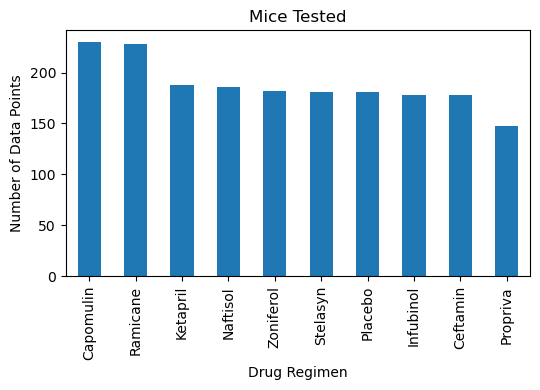

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_data = clean_df['Drug Regimen'].value_counts()
#drug_regimen_data

drug_regimen_data.plot(kind="bar",figsize=(5.5,4))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Mice Tested")
plt.tight_layout()

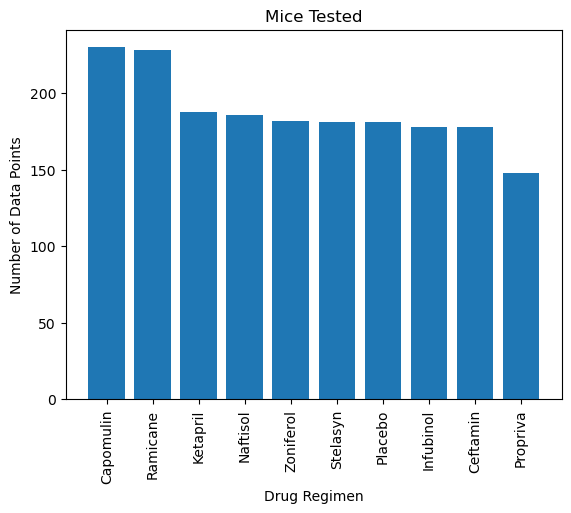

<Figure size 640x480 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimen_data.index.values, drug_regimen_data.values)
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Mice Tested")
plt.show()
plt.tight_layout()

<Axes: ylabel='Sex'>

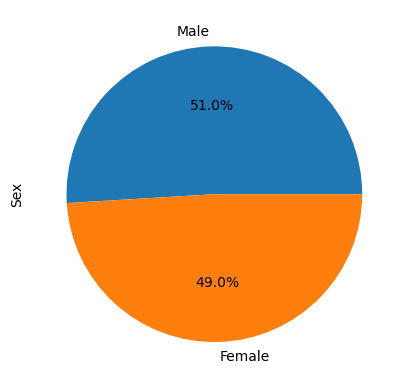

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_df['Sex'].value_counts()
sex_count.plot(kind="pie", autopct="%1.1f%%", ylabel = "Sex")


Text(0, 0.5, 'Sex')

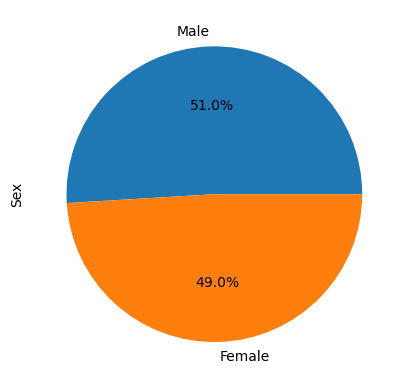

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count.values, labels=sex_count.index.values,autopct="%1.1f%%")
plt.ylabel('Sex') 

## Quartiles, Outliers and Boxplots


In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_max_df = pd.DataFrame(clean_df.groupby(['Mouse ID'])['Timepoint'].max())
#timepoint_max_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#merge data with greatest timepoint with original cleaned data.
#new column for time point is created after the merge...timepoint_y

merged_max_df= pd.merge(clean_df, timepoint_max_df, how='right', on=('Mouse ID', 'Timepoint'))

merged_max_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


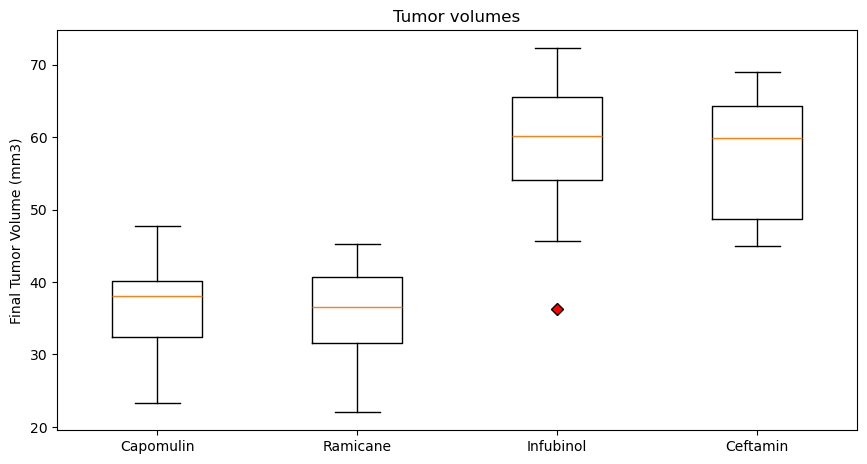

In [16]:
# Put treatments into a list for for loop (and later for plot labels)

###Using Matplotlib, generate a box plot of the final tumor volume for all four treatment regimens
#Create a list that holds the treatment names
treatment_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#using .iloc group the data by the drug regimen for the four drugs.
#identify the max tumor volume for each and use it to plot
capomulin = merged_max_df.loc[merged_max_df["Drug Regimen"] == "Capomulin",:]
capo = capomulin['Tumor Volume (mm3)']

ramicane = merged_max_df.loc[merged_max_df["Drug Regimen"] == "Ramicane",:]
rami = ramicane['Tumor Volume (mm3)']

infubinol = merged_max_df.loc[merged_max_df["Drug Regimen"] == "Infubinol",:]
infu = infubinol['Tumor Volume (mm3)']

ceftamin = merged_max_df.loc[merged_max_df["Drug Regimen"] == "Ceftamin",:]
caft = ceftamin['Tumor Volume (mm3)']
#put the grouped drug regimen data in a single data format for plotting
data = [capo, rami, infu, caft]
 
fig = plt.figure(figsize =(8, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
red_diamond = dict(markerfacecolor='r', marker='D')
plt.boxplot(data, labels=treatment_list,flierprops=red_diamond) 
ax.set_title('Tumor volumes')
ax.set_ylabel('Final Tumor Volume (mm3)')
 
# show plot
plt.show()
# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


## Line and Scatter Plots

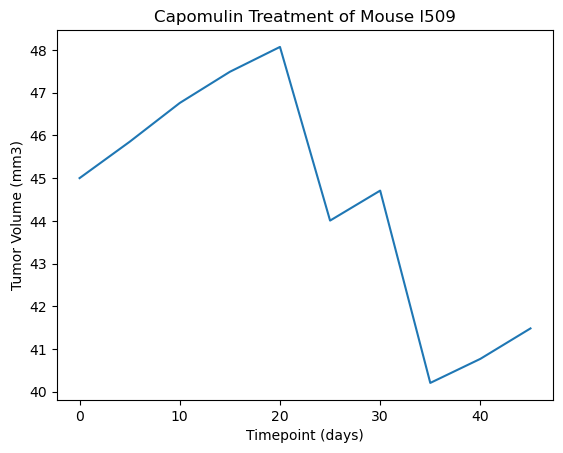

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_capomulin = clean_df.loc[clean_df['Mouse ID'] == 'l509']
plt.plot(mouse_capomulin['Timepoint'], mouse_capomulin['Tumor Volume (mm3)'])
# Add labels and title to plot
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

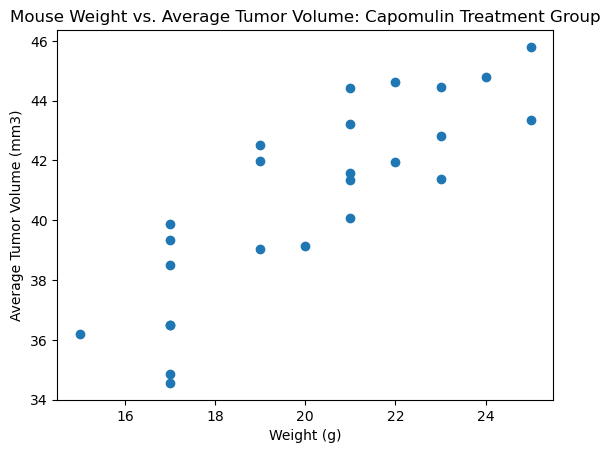

In [18]:
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Tumor volume per mouse
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Weight per mouse
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Make scatterplot
x_values = mouse_weight
y_values = avg_tumor_volume
plt.scatter(x_values,y_values)

# Labels
plt.title("Mouse Weight vs. Average Tumor Volume: Capomulin Treatment Group")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708723


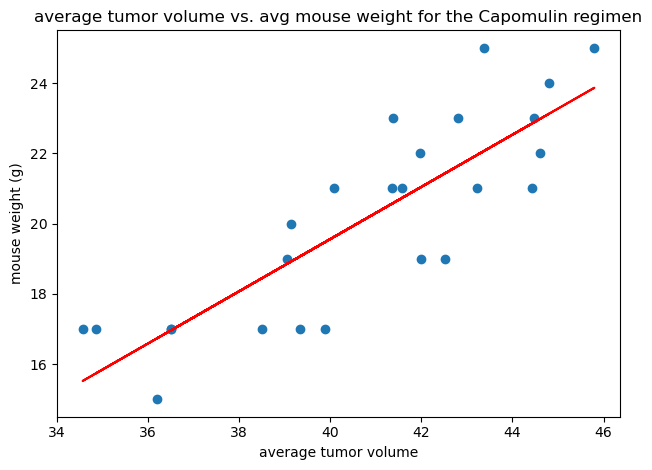

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_tumor_volume, mouse_weight)
regress_values = avg_tumor_volume * slope + intercept
print(f"The r-squared is: {rvalue**2}")
plt.scatter(avg_tumor_volume, mouse_weight)
plt.plot(avg_tumor_volume,regress_values,"r-")
plt.title(f"average tumor volume vs. avg mouse weight for the Capomulin regimen")
plt.xlabel('average tumor volume')
plt.ylabel("mouse weight (g)")
plt.tight_layout()
plt.show()